In [49]:
#Required packages/imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import get_data

In [50]:
#Cluster dataframe
cluster_dataset = get_data.read_csv('epidemic', 'clusters')
cluster_dataset = get_data.convert_state_code(cluster_dataset)

In [51]:
##Cluster dataframe - general display
cluster_dataset

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
0,KLUSTER WARGA JEPUN,W.P. KUALA LUMPUR,LEMBAH PANTAI,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3,NaN,NaN
1,KLUSTER UDA,"JOHOR,NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMP...",PELBAGAI,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142,NaN,NaN
2,KLUSTER KEAGAMAAN (TABLIGH SRI PETALING),not stated,PELBAGAI,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988,NaN,NaN
3,KLUSTER TABLIGH NEW DELHI,"NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMPUR,W.P...",PELBAGAI,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24,NaN,NaN
4,KLUSTER AIROD,PAHANG,KUANTAN,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,KLUSTER DUA JALAN PADANG GOLF 3,SELANGOR,HULU SELANGOR,2022-11-26,2022-11-25,highRisk,active,0,25,25,35,0,0,0,Kluster ini merupakan kluster berulang untuk k...,This is a third recurring cluster involving re...
7152,KLUSTER JALAN PADANG GOLF 5,SELANGOR,HULU SELANGOR,2022-11-27,2022-11-26,highRisk,active,0,3,3,13,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the fifth repeated cluster inv...
7153,KLUSTER DAH BATU 19,KEDAH,KUBANG PASU,2022-11-27,2022-12-04,education,active,12,84,84,214,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves students from an educati...
7154,KLUSTER DAH TERABAK,KEDAH,KUBANG PASU,2022-12-01,2022-12-04,education,active,2,89,89,702,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves the students of an educa...


In [52]:
#Cluster dataframe - info
cluster_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cluster          7156 non-null   object
 1   state            7156 non-null   object
 2   district         7143 non-null   object
 3   date_announced   7156 non-null   object
 4   date_last_onset  7156 non-null   object
 5   category         7156 non-null   object
 6   status           7156 non-null   object
 7   cases_new        7156 non-null   int64 
 8   cases_total      7156 non-null   int64 
 9   cases_active     7156 non-null   int64 
 10  tests            7156 non-null   int64 
 11  icu              7156 non-null   int64 
 12  deaths           7156 non-null   int64 
 13  recovered        7156 non-null   int64 
 14  summary_bm       1545 non-null   object
 15  summary_en       1545 non-null   object
dtypes: int64(7), object(9)
memory usage: 894.6+ KB


In [53]:
#Cluster dataframe - head
cluster_dataset.head(5)

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
0,KLUSTER WARGA JEPUN,W.P. KUALA LUMPUR,LEMBAH PANTAI,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3,NaN,NaN
1,KLUSTER UDA,"JOHOR,NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMP...",PELBAGAI,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142,NaN,NaN
2,KLUSTER KEAGAMAAN (TABLIGH SRI PETALING),not stated,PELBAGAI,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988,NaN,NaN
3,KLUSTER TABLIGH NEW DELHI,"NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMPUR,W.P...",PELBAGAI,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24,NaN,NaN
4,KLUSTER AIROD,PAHANG,KUANTAN,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65,NaN,NaN


In [54]:
#Cluster dataframe - tail
cluster_dataset.tail(5)

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
7151,KLUSTER DUA JALAN PADANG GOLF 3,SELANGOR,HULU SELANGOR,2022-11-26,2022-11-25,highRisk,active,0,25,25,35,0,0,0,Kluster ini merupakan kluster berulang untuk k...,This is a third recurring cluster involving re...
7152,KLUSTER JALAN PADANG GOLF 5,SELANGOR,HULU SELANGOR,2022-11-27,2022-11-26,highRisk,active,0,3,3,13,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the fifth repeated cluster inv...
7153,KLUSTER DAH BATU 19,KEDAH,KUBANG PASU,2022-11-27,2022-12-04,education,active,12,84,84,214,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves students from an educati...
7154,KLUSTER DAH TERABAK,KEDAH,KUBANG PASU,2022-12-01,2022-12-04,education,active,2,89,89,702,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves the students of an educa...
7155,KLUSTER JALAN KAKI BUKIT,PERLIS,KANGAR,2022-12-02,2022-12-03,education,active,0,12,12,12,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves the students of an educa...


In [55]:
#Cluster dataframe - columns
print(cluster_dataset.columns)

Index(['cluster', 'state', 'district', 'date_announced', 'date_last_onset',
       'category', 'status', 'cases_new', 'cases_total', 'cases_active',
       'tests', 'icu', 'deaths', 'recovered', 'summary_bm', 'summary_en'],
      dtype='object')


In [56]:
#Cluster dataframe - shape
print(cluster_dataset.shape)

(7156, 16)


In [57]:
#Cluster dataframe - dtypes
print(cluster_dataset.dtypes)

cluster            object
state              object
district           object
date_announced     object
date_last_onset    object
category           object
status             object
cases_new           int64
cases_total         int64
cases_active        int64
tests               int64
icu                 int64
deaths              int64
recovered           int64
summary_bm         object
summary_en         object
dtype: object


In [58]:
#Cluster dataframe - presence of NaN/null values
count_nan = cluster_dataset.isnull().sum()
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: cluster               0
state                 0
district             13
date_announced        0
date_last_onset       0
category              0
status                0
cases_new             0
cases_total           0
cases_active          0
tests                 0
icu                   0
deaths                0
recovered             0
summary_bm         5611
summary_en         5611
dtype: int64


In [59]:
#Cluster dataframe - cases_total sort by category
category_cT = cluster_dataset.pivot_table(index= 'category',aggfunc='sum').sort_values('cases_total', ascending = False)['cases_total']
category_cT

C:\Users\Ming\AppData\Local\Temp\ipykernel_13124\3878120824.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_cT = cluster_dataset.pivot_table(index= 'category',aggfunc='sum').sort_values('cases_total', ascending = False)['cases_total']


category
workplace          322135
community          110855
education           49374
detentionCentre     42013
highRisk            18346
religious           16076
import               2441
Name: cases_total, dtype: int64

In [65]:
#Cluster dataframe - category description
cluster_dataset['category'].describe()

count          7156
unique            7
top       workplace
freq           3567
Name: category, dtype: object

In [71]:
#Cluster dataframe - values of each element within category
category_No = cluster_dataset.groupby('category').count()['cluster'].sort_values(ascending = False)

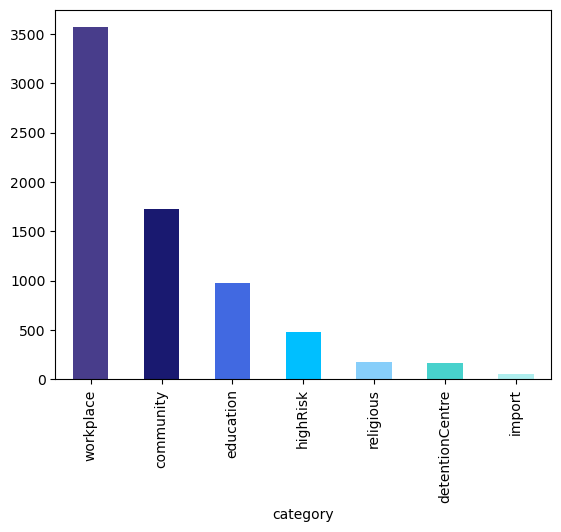

In [73]:
#Cluster dataframe - category_No bar plot
category_No.plot(kind = 'bar', color = ['darkslateblue', 'midnightblue', 'royalblue', 'deepskyblue', 'lightskyblue', 'mediumturquoise', 'paleturquoise'])
plt.show()

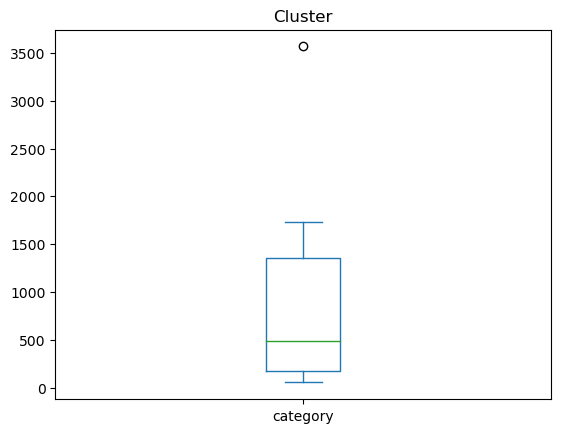

In [74]:
#Cluster dataframe - category_No box plot
category_No.plot(kind = 'box')
plt.title('Cluster')
plt.xticks([1],['category'])
plt.show()

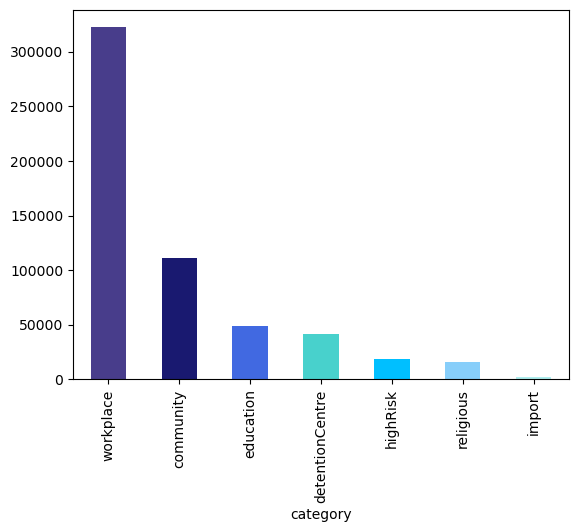

In [70]:
#Cluster dataframe - category_CT bar plot
category_cT.plot(kind = 'bar', color = ['darkslateblue', 'midnightblue', 'royalblue', 'mediumturquoise', 'deepskyblue', 'lightskyblue', 'paleturquoise'])
plt.show()